In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

# Load the Data

## Order Leads

In [3]:
order_leads = pd.read_csv('../data/order_leads.csv', parse_dates=['Date'])
print(order_leads.shape)
order_leads.head()

(100000, 6)


,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


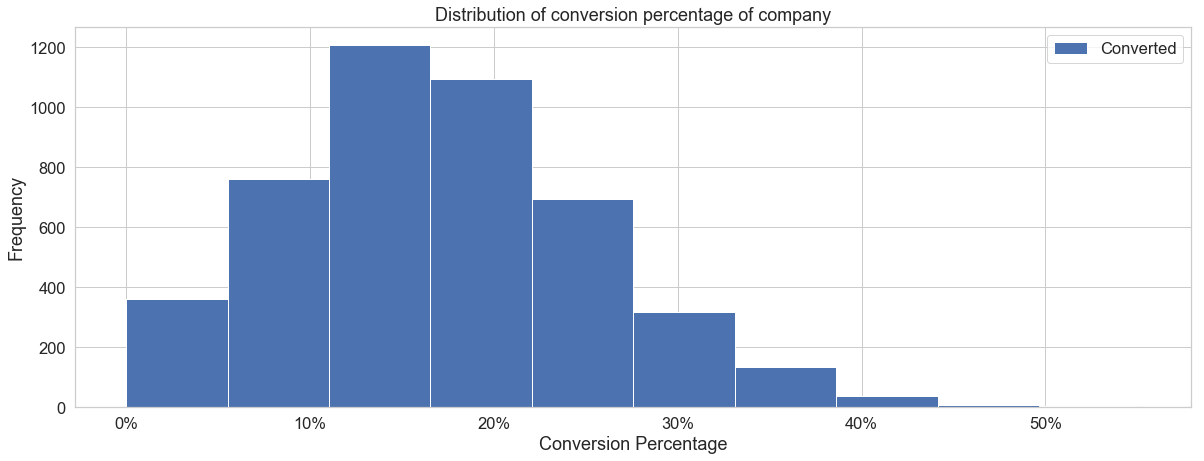

In [4]:
data = order_leads.groupby('Company Name').agg({'Converted' : 'mean'})
ax = data.plot(kind = 'hist')
plt.title('Distribution of conversion percentage of company')
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x*100) for x in vals])
plt.xlabel('Conversion Percentage')
plt.show()

##  Sales Team

In [5]:
sales_team = pd.read_csv('../data/sales_team.csv')
print(sales_team.shape)
sales_team.head()

(4619, 4)


,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [6]:
len(sales_team['Sales Rep'].unique())

499

In [7]:
len(sales_team['Company Name'].unique())

4619

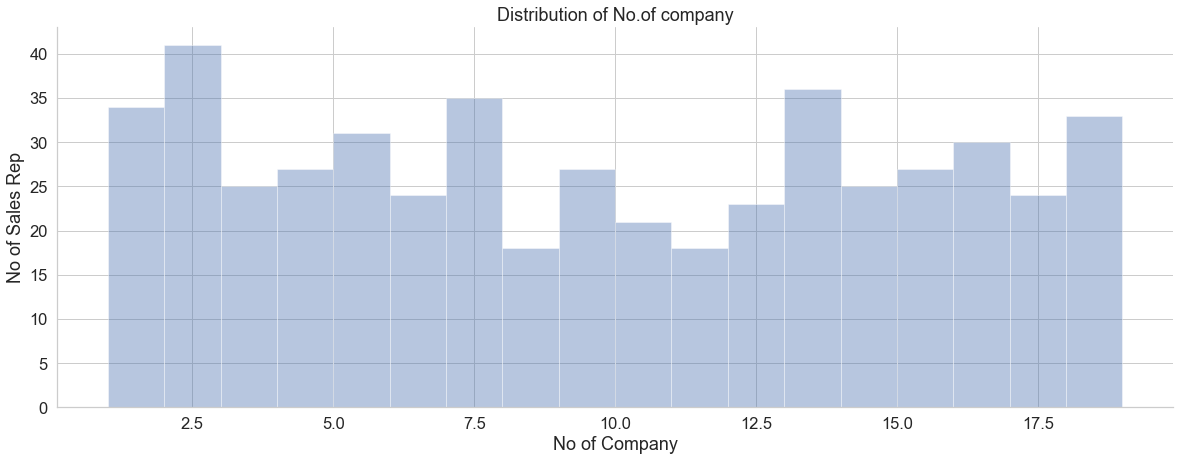

In [8]:
data = sales_team.groupby('Sales Rep').agg({'Company Name': 'count'}).sort_values('Company Name', ascending = False)['Company Name']
ax = sns.distplot(data, kde = False, bins=range(1, 20))
ax.set_title('Distribution of No.of company')
ax.set(xlabel='No of Company', ylabel='No of Sales Rep')
sns.despine()

## Invoices

In [19]:
invoices = pd.read_csv('../data/invoices.csv', parse_dates=['Date of Meal'])
print(invoices.shape)
invoices.head()

(49990, 5)


,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,['Arthur Lopez'],295.0
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,['Arthur Lopez'],348.0


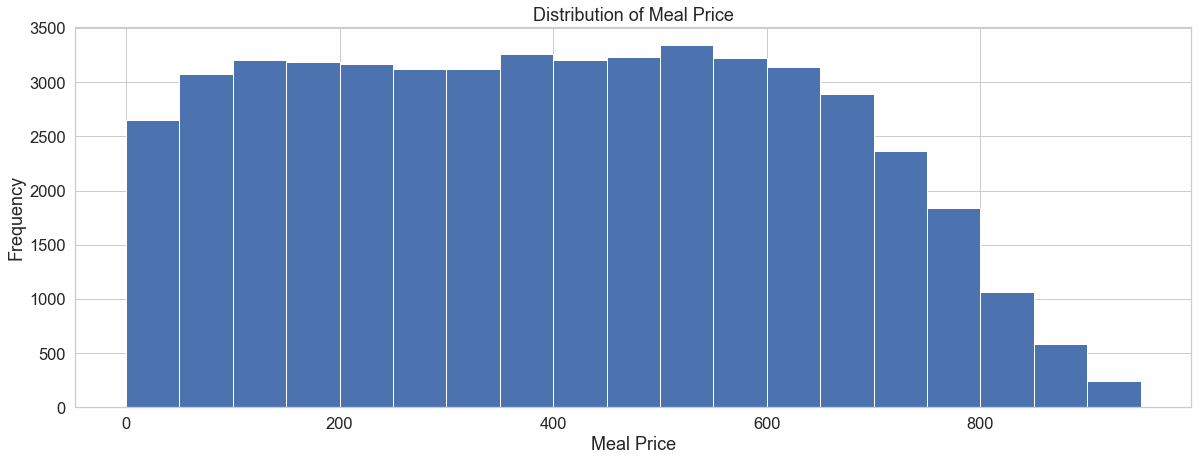

In [10]:
invoices['Meal Price'].plot(kind = 'hist', bins = range(0, 1000, 50))
plt.title('Distribution of Meal Price')
plt.xlabel('Meal Price')
plt.show()

# Exploration and Visualisation

## Conversion rate development

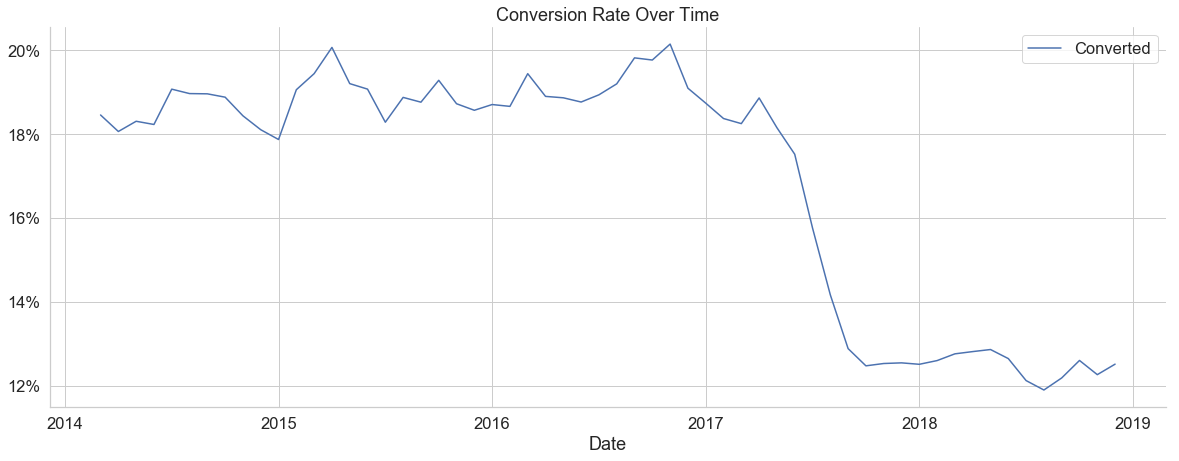

In [11]:
data =  order_leads.set_index(pd.DatetimeIndex(order_leads.Date)).groupby(pd.Grouper(freq='M')).agg({'Converted' : 'mean'})
ax = data.rolling(3).mean().plot(kind = 'line')
plt.title('Conversion Rate Over Time')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}%'.format(x*100) for x in vals])
sns.despine()

## Conversion rate accross sales reps

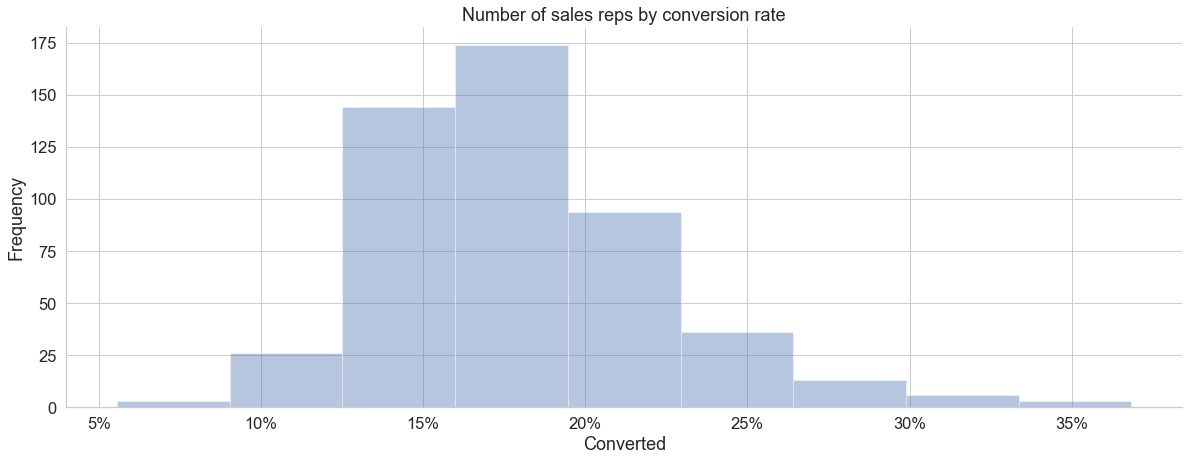

In [13]:
data = pd.merge(order_leads,sales_team,on=['Company Id','Company Name'])
ax = sns.distplot(data.groupby('Sales Rep Id')['Converted'].mean(), bins = 9,kde=False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x*100) for x in vals])
ax.set(ylabel = 'Frequency')
ax.set_title('Number of sales reps by conversion rate')
sns.despine()


## Effect of number of accounts

c:\users\manohar\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


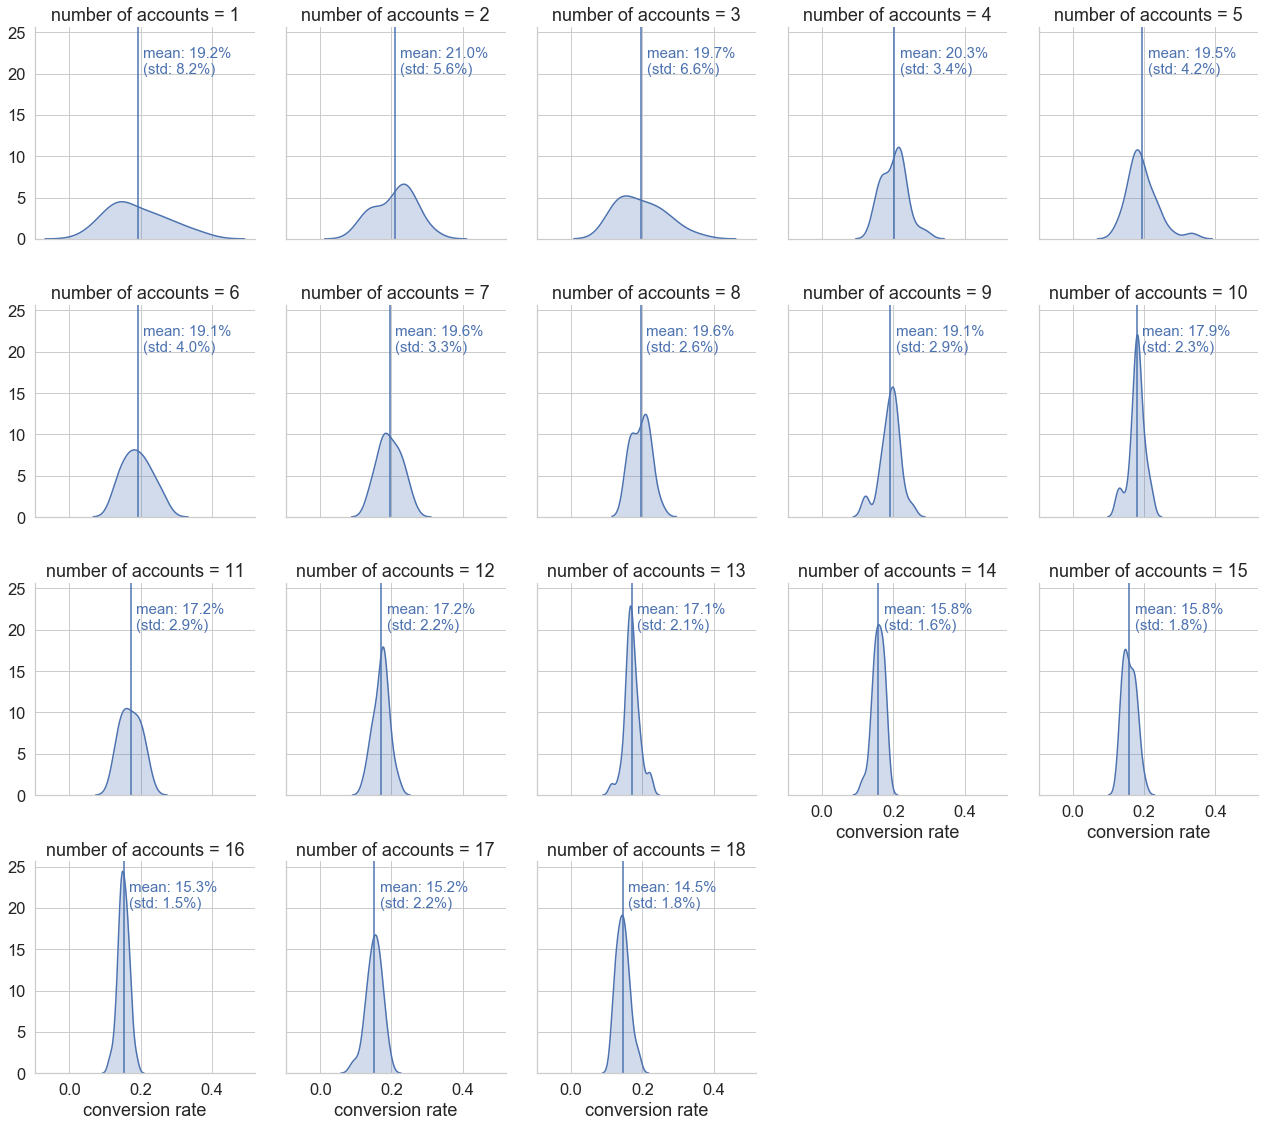

In [14]:
def vertical_mean_line(x, **kwargs):
    ls = {"0":"-","1":"--"}
    plt.axvline(x.mean(), linestyle =ls[kwargs.get("label","0")], 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))
    tx = "mean: {:.1f}%\n(std: {:.1f}%)".format(x.mean()*100,x.std()*100)
    label_x_pos_adjustment = 0.015 
    label_y_pos_adjustment = 20
    plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)


data2 = data.groupby('Sales Rep Id').agg({'Converted': 'mean', 'Company Id': 'nunique'})
data2.columns = ['conversion rate','number of accounts']

g = sns.FacetGrid(data2, col="number of accounts", height=4, aspect=0.9, col_wrap=5)
g.map(sns.kdeplot, "conversion rate", shade=True)
# g.set(xlim=(0, 0.35))
g.map(vertical_mean_line, "conversion rate")

## Effect of meals

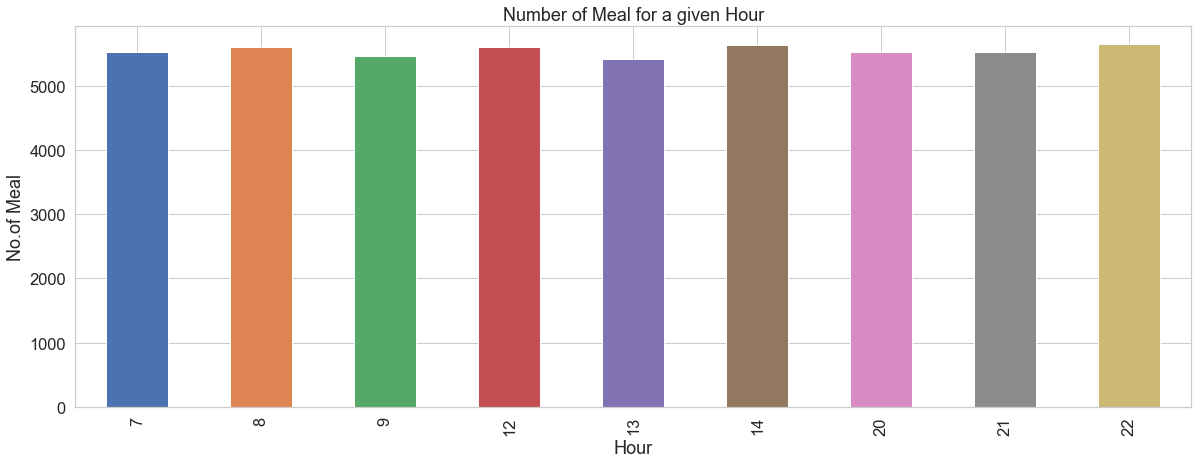

In [188]:
invoices['Date of Meal'].dt.hour.value_counts().sort_index().plot(kind = 'bar');
plt.title('Number of Meal for a given Hour')
plt.xlabel('Hour')
plt.ylabel('No.of Meal')
plt.show()

In [20]:
invoices['Type of Meal'] = pd.cut(
    invoices['Date of Meal'].dt.hour,
    bins=[0,10,15,24],
    labels=['breakfast','lunch','dinner']
)
invoices.head()

,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0,dinner
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0,breakfast
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,['Arthur Lopez'],295.0,dinner
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0,lunch
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,['Arthur Lopez'],348.0,breakfast


In [21]:
import re
def replace2(x):
    return re.findall('\w[\w ]+', x)

invoices['Participants'] = invoices['Participants'].apply(lambda x: replace2(x))
invoices['Number Participants'] = invoices['Participants'].apply(lambda x: len(x))
invoices.head()

,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Number Participants
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,[Violet Medina],598.0,dinner,1
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,[Connie Harper],89.0,breakfast,1
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,[Arthur Lopez],295.0,dinner,1
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,"[Violet Medina, Arthur Lopez]",193.0,lunch,2
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,[Arthur Lopez],348.0,breakfast,1


In [198]:
data.head(2)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Number Participants
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QBGU1W8BRZZFHYUZ,2017-10-09 21:00:00,[Violet Medina],598.0,dinner,1
1,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QFNO07V7P3BTJSDK,2018-06-07 07:00:00,[Connie Harper],89.0,breakfast,1


In [22]:
data = pd.merge(order_leads,invoices,how='left',on='Company Id')

In [27]:
data['Days of meal before order'] = (data.Date - data['Date of Meal']).dt.days
data = data[abs(data['Days of meal before order']) < 5]
data = data.loc[abs(data['Days of meal before order']).sort_values().index]

In [32]:
orders_with_invoices = data.drop_duplicates(subset=['Order Id'])
orders_without_invoices = order_leads[~order_leads['Order Id'].isin(orders_with_invoices['Order Id'].unique())]
orders_with_meals = pd.concat([orders_with_invoices,orders_without_invoices],sort=True)


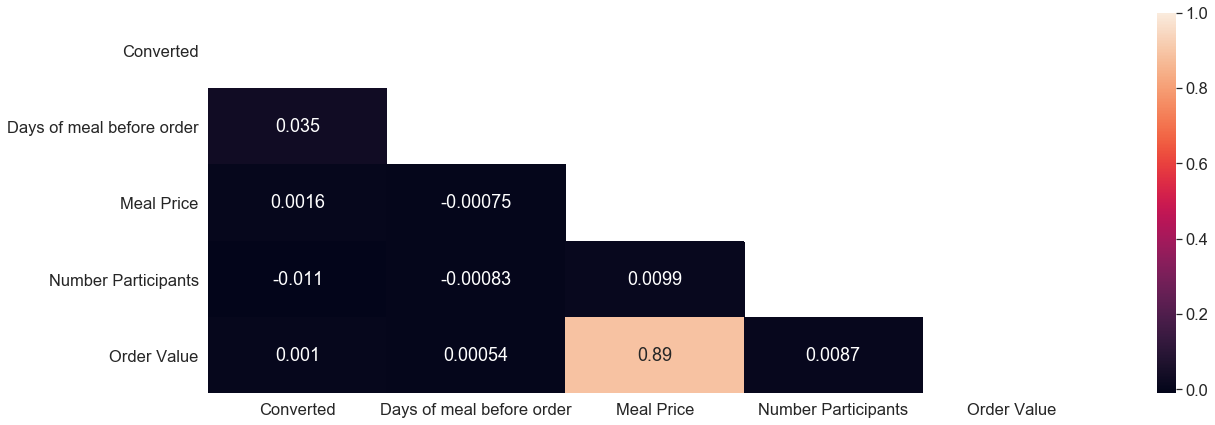

In [54]:
mask = np.zeros_like(orders_with_meals.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(orders_with_meals.corr(),  annot= True, mask = mask)

In [34]:
def plot_bars(data,x_col,y_col):
    data = data.reset_index()
    sns.set(
        font_scale=1.5,
        style="whitegrid",
        rc={'figure.figsize':(20,7)}
    )
    g = sns.barplot(x=x_col, y=y_col, data=data, color='royalblue')

    for p in g.patches:
        g.annotate(
            format(p.get_height(), '.2%'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 10), 
            textcoords = 'offset points'
        )
        
    vals = g.get_yticks()
    g.set_yticklabels(['{:,.0f}%'.format(x*100) for x in vals])

    sns.despine()

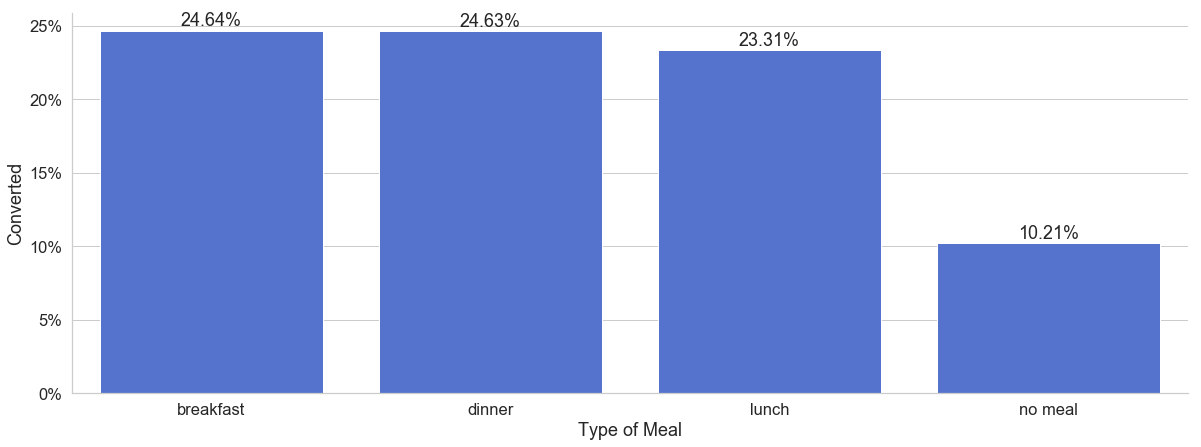

In [35]:
orders_with_meals['Type of Meal'].fillna('no meal',inplace=True)
data = orders_with_meals.groupby('Type of Meal').agg({'Converted': 'mean'})
plot_bars(data, x_col='Type of Meal', y_col='Converted')

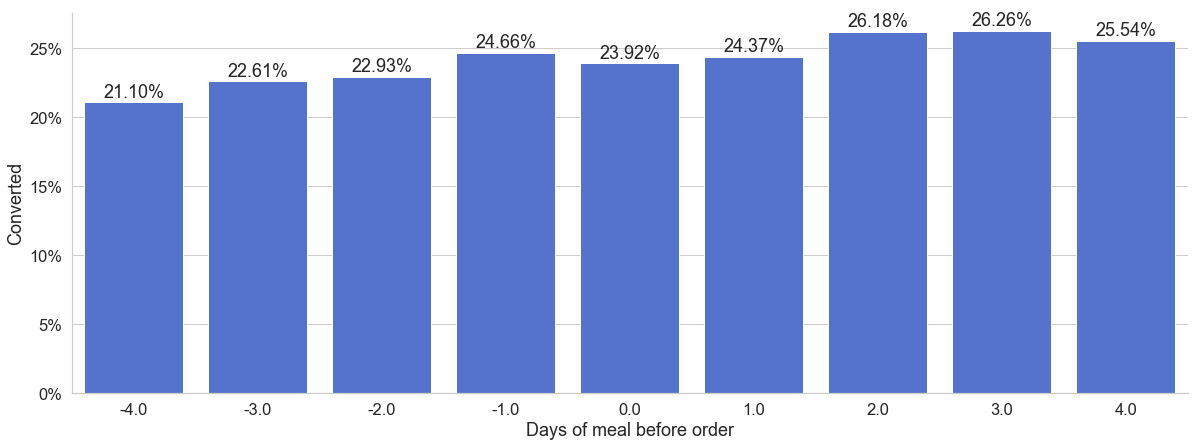

In [36]:
data = orders_with_meals.groupby(['Days of meal before order']).agg({'Converted': 'mean'})
plot_bars(data=data, x_col='Days of meal before order', y_col='Converted')

In [37]:
orders_with_meals

,Company Id,Company Name,Converted,Date,Date of Meal,Days of meal before order,Meal Id,Meal Price,Number Participants,Order Id,Order Value,Participants,Type of Meal
712602,2II1NASXZGEORCH2,By-Gone Shinbone,1,2017-11-24,2017-11-23 14:00:00,0.0,SHDCAVQQA8HCFVSL,427.0,4.0,M2AQGEDCJ18K4XA6,5774,"[Wendy Meza, John Devine, Raul Bradley, Jessie...",lunch
586294,Z17VDRE18MQERYH7,Eight-Year Wishart,0,2018-05-27,2018-05-26 22:00:00,0.0,RXZLS3DI1VR4L3EL,335.0,2.0,E3ZMO1M511QZL8GC,4998,"[Jean Hayden, Andrew Moseley]",dinner
200128,GCUZRJ3BMWS9UZM5,Additional Goad,0,2016-05-25,2016-05-24 07:00:00,0.0,UY4AKSVRJVSZ8ROZ,515.0,3.0,OTB9G4B0BWRK9P6V,5369,"[Johnny Griffin, Stephen Rodriguez, Isaura Bar...",breakfast
103823,MFP7UB2DQM304QNV,Communist-Inspired Sets,0,2015-08-01,2015-07-31 22:00:00,0.0,XLCBYDM7K9YCYTPK,669.0,1.0,FZNQMXKDOH0NIWU6,7692,[Betty Crabb],dinner
398990,S2QFKE57NAO9S6C1,Boon Bones,0,2016-06-15,2016-06-14 12:00:00,0.0,KHDD2ULT7EHMBSSK,119.0,1.0,W0XDP91IMZ22XIUO,2172,[Lawrence Palmer],lunch
837804,3M92NTAP8BX2EELR,Nice-Looking Leroy,0,2014-12-06,2014-12-05 14:00:00,0.0,8GEHQGQIBR172QDK,570.0,2.0,KRMC44FL2JSIQESN,1739,"[Leona Evans, Lori Adams]",lunch
103592,MFP7UB2DQM304QNV,Communist-Inspired Sets,0,2014-04-30,2014-04-29 13:00:00,0.0,FI3RBMBJBC792JPK,339.0,1.0,XOBZFTSVYMJSQ3KN,4837,[Betty Crabb],lunch
103575,MFP7UB2DQM304QNV,Communist-Inspired Sets,0,2014-05-27,2014-05-26 09:00:00,0.0,CS3GQG1P4L1P5IUV,88.0,1.0,40JQMFRB0FO48WU9,1053,[Betty Crabb],breakfast
837842,W89U9GKBADTDKY4L,Leaden Hookworm,0,2016-09-13,2016-09-12 08:00:00,0.0,QUFMPC3QCWSY9VF9,318.0,3.0,KMWADPNM8N63OFCV,4482,"[Quiana Riley, Janie Artrip, William Bixby]",breakfast
303250,EFCFLIWYJFXBZK06,Jacksonian '80'S,0,2017-04-29,2017-04-28 08:00:00,0.0,KGB0WIT2PAGUFYXN,477.0,1.0,MGCVCEO25EU0C5UY,5486,[Bradley Early],breakfast


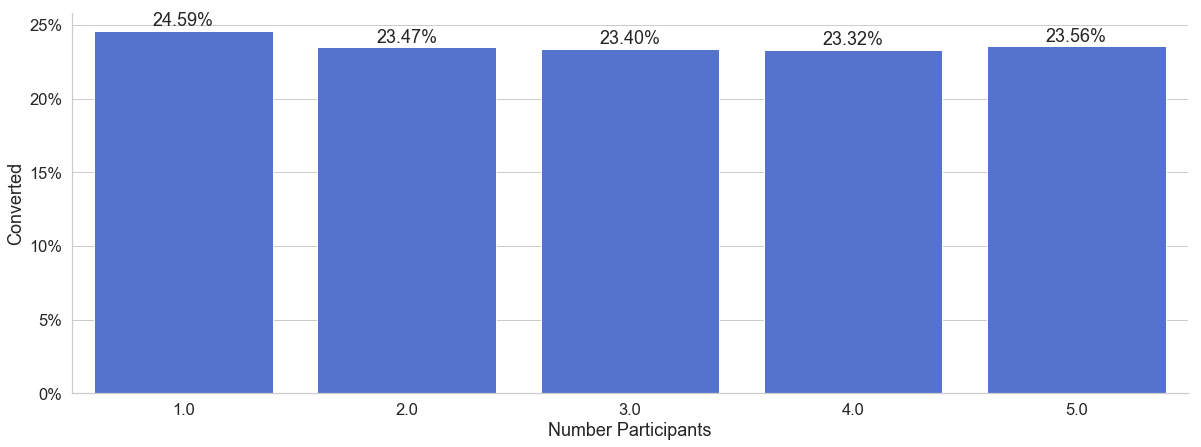

In [45]:
data = orders_with_meals.groupby(['Number Participants']).agg({'Converted' : 'mean'})
plot_bars(data, x_col='Number Participants',y_col = 'Converted')

In [57]:
orders_with_meals['order_month'] = orders_with_meals.Date.dt.month

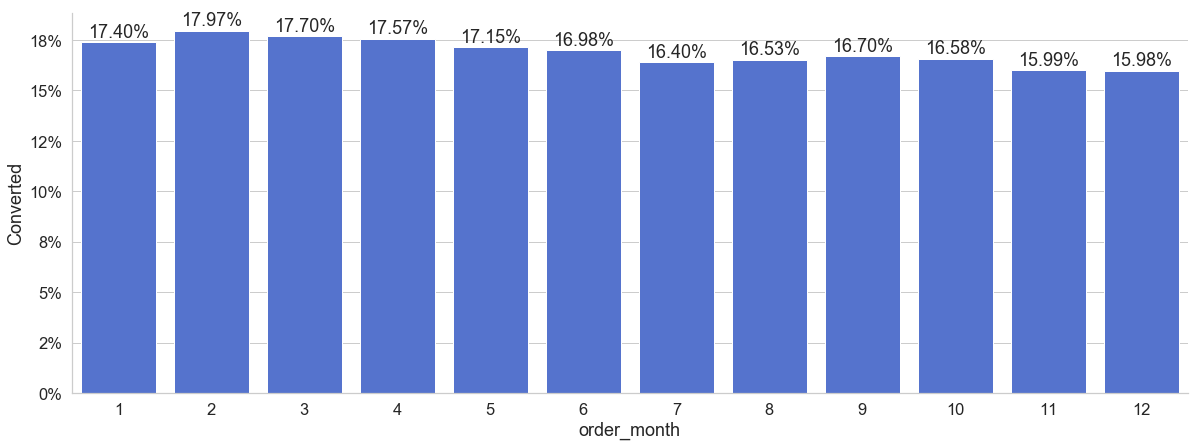

In [58]:
data = orders_with_meals.groupby(['order_month']).agg({'Converted' : 'mean'})
plot_bars(data, x_col='order_month',y_col = 'Converted')